In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib.font_manager as fm
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우

plt.rc('axes', unicode_minus=False)  # 마이너스 깨짐 방지

In [5]:
df = pd.read_csv('./data/merge_data.csv')
df.head(2)

,nickname,world_name,character_class,character_level,character_exp_rate,character_date_create,dojang_best_floor,dojang_best_time,popularity,최소 스탯공격력,...,상태이상 추가 데미지,무기 숙련도,추가 경험치 획득,공격력,마력,전투력,소환수 지속시간 증가,force_sum,force_mean,force_min
0,아델,스카니아,아델,292,47.568,2020-01-16T00:00+09:00,99,896,8778,373904068,...,14.0,90,195.0,19129,4232,1352790435,10,2080.0,160.0,100.0
1,흡혈,스카니아,데몬어벤져,285,70.911,2022-03-30T00:00+09:00,85,884,595,271680490,...,14.0,90,59.0,14009,3710,1184547868,10,1950.0,150.0,0.0


In [6]:
df.shape

(474, 56)

In [11]:
df.columns

Index(['nickname', 'world_name', 'character_class', 'character_level',
       'character_exp_rate', 'character_date_create', 'dojang_best_floor',
       'dojang_best_time', 'popularity', '최소 스탯공격력', '최대 스탯공격력', '데미지',
       '보스 몬스터 데미지', '최종 데미지', '방어율 무시', '크리티컬 확률', '크리티컬 데미지', '상태이상 내성',
       '스탠스', '방어력', '이동속도', '점프력', '스타포스', '아케인포스', '어센틱포스', 'STR', 'DEX',
       'INT', 'LUK', 'HP', 'MP', 'AP 배분 STR', 'AP 배분 DEX', 'AP 배분 INT',
       'AP 배분 LUK', 'AP 배분 HP', 'AP 배분 MP', '아이템 드롭률', '메소 획득량', '버프 지속시간',
       '공격 속도', '일반 몬스터 데미지', '재사용 대기시간 감소 (초)', '재사용 대기시간 감소 (%)',
       '재사용 대기시간 미적용', '속성 내성 무시', '상태이상 추가 데미지', '무기 숙련도', '추가 경험치 획득', '공격력',
       '마력', '전투력', '소환수 지속시간 증가', 'force_sum', 'force_mean', 'force_min'],
      dtype='object')

## 1. 직업별 평균 도장층수 분석

- 각 직업별로 도장 최고층수의 평균값과 표준편차 비교 및 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_15652\3135765124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_stats, x='mean', y='character_class', palette='Blues_d')


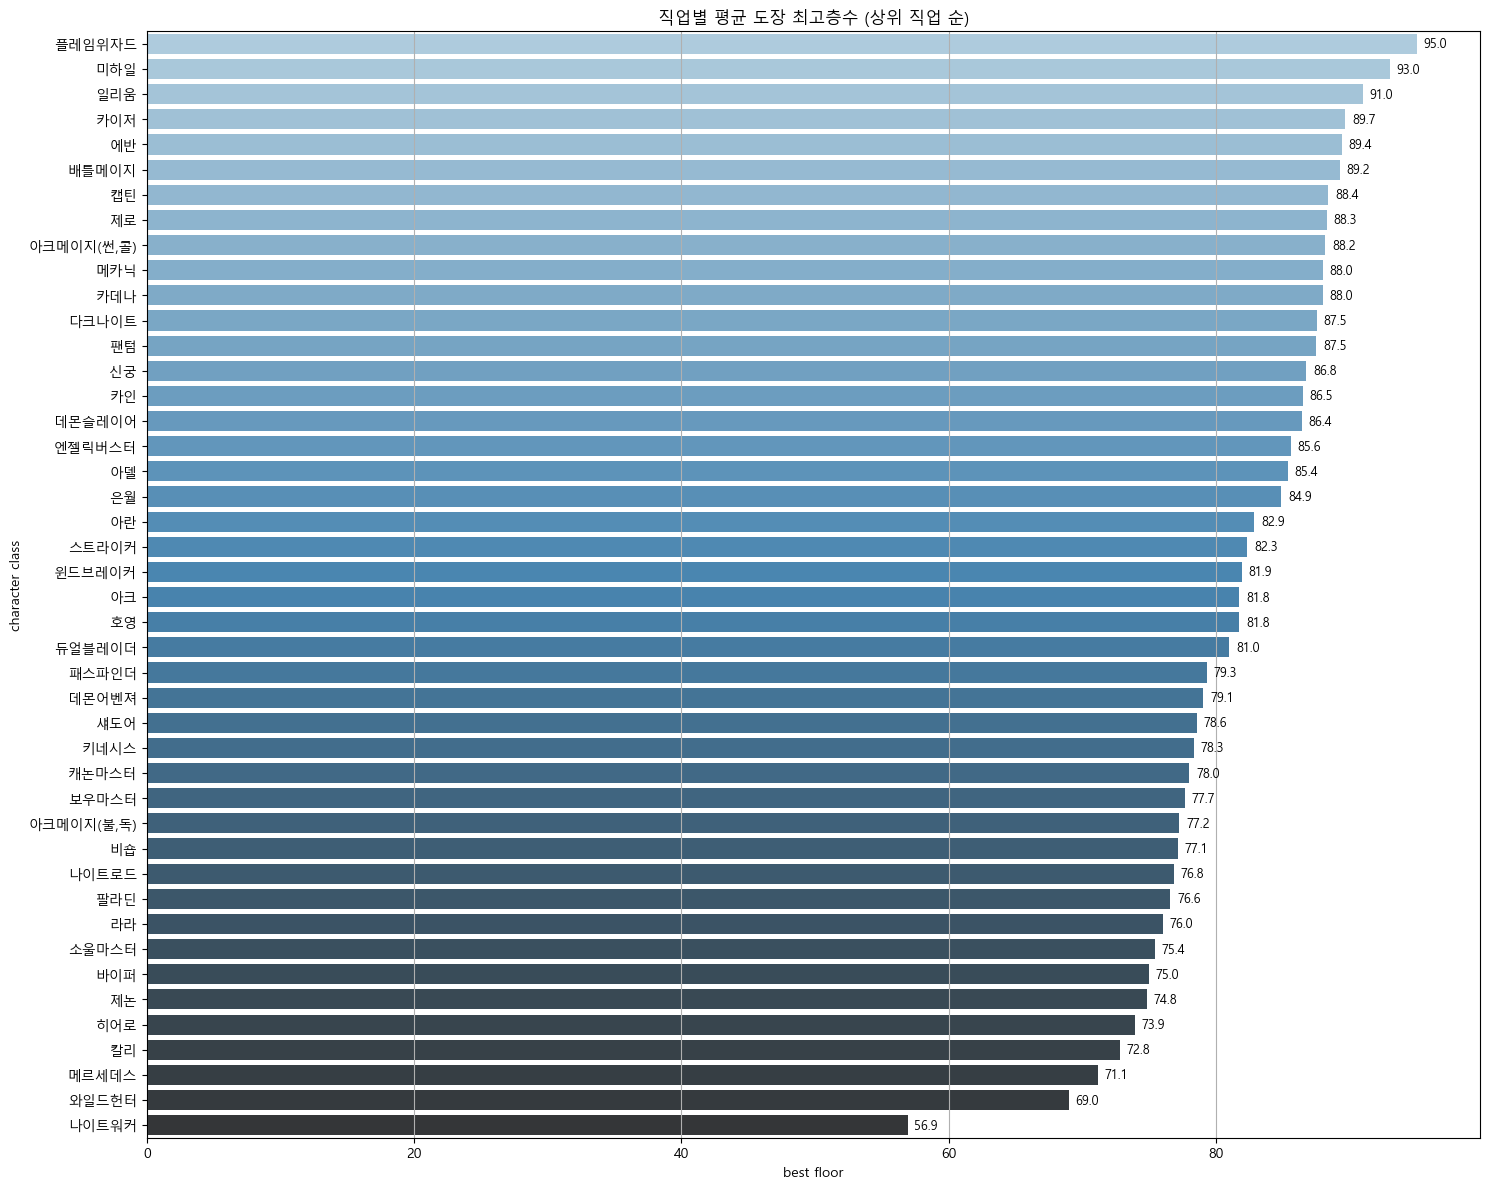

In [15]:
# 직업별 평균 및 표준편차 도장층수 계산
job_stats = df.groupby('character_class')['dojang_best_floor'].agg(['mean','std','count']).sort_values('mean',ascending=False).reset_index()

plt.figure(figsize=(15,12))
sns.barplot(data=job_stats, x='mean', y='character_class', palette='Blues_d')

for i, (mean, name) in enumerate(zip(job_stats['mean'], job_stats['character_class'])):
    plt.text(mean + 0.5, i, f'{mean:.1f}', va='center', fontsize=9 )

plt.xlabel('best floor')
plt.ylabel('character class')
plt.title('직업별 평균 도장 최고층수 (상위 직업 순)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## 2. 전투력 vs 도장 최고층수 상관분석

- 전투력과 도장 최고층수에 상관관계가 존재하는가???에 대한 궁금증

corr : -0.00, p-value : 0.93


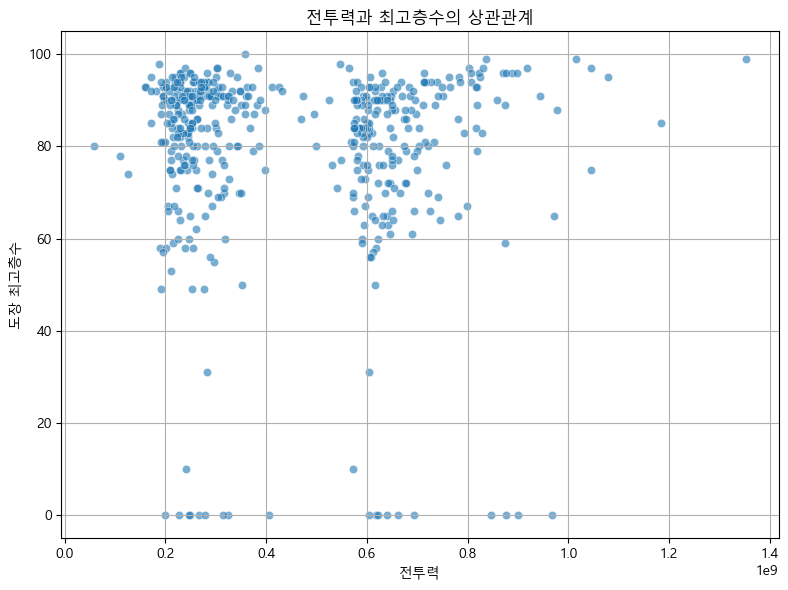

In [16]:
# spearman corr
from scipy.stats import spearmanr

corr, p = spearmanr(df['전투력'], df['dojang_best_floor'])
print(f'corr : {corr:.2f}, p-value : {p:.2f}')

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='전투력', y='dojang_best_floor', alpha=0.6)
plt.title(f'전투력과 최고층수의 상관관계')
plt.xlabel('전투력')
plt.ylabel('도장 최고층수')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
df['dojang_best_floor'].max(), df['전투력'].max()

(100, 1352790435)

- 그림이 별로 이쁘지 않은 이유는 전투력은 억단위가 넘어가는 반면 층수는 제일 높아봐야 100층이다.
- 전투력에 log변환을 통해 두 변수들 사이의 스케일을 맞추어서 다시 그려보자

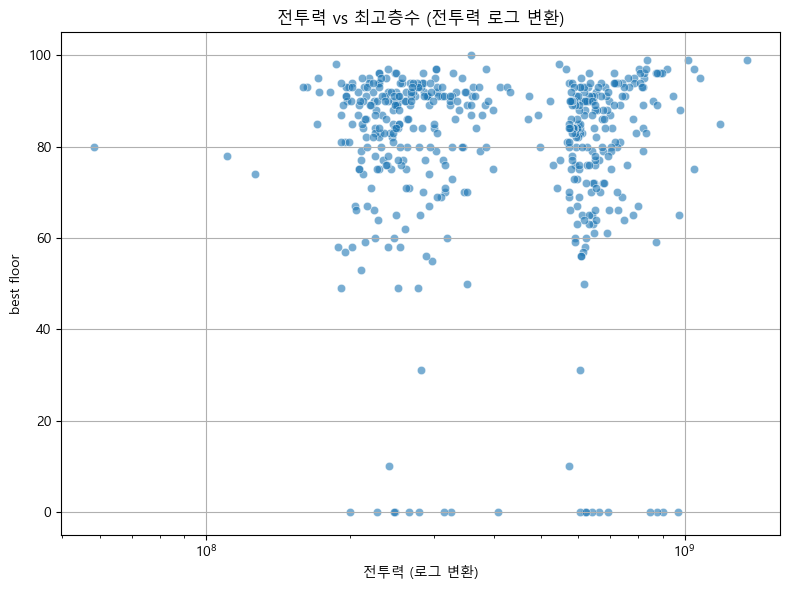

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='전투력', y='dojang_best_floor', alpha=0.6)
plt.xscale('log') # 전투력에 log 변환 
plt.title('전투력 vs 최고층수 (전투력 로그 변환)')
plt.xlabel('전투력 (로그 변환)')
plt.ylabel('best floor')
plt.grid(True)
plt.tight_layout()
plt.show()

- 여전히 해석은 가능은 하겠지만 해당 그림이 직관적인가에 대해서는 잘 모르겠음
- 구간별 박스플롯, kdeplot, hexbin을 그려보면서 밀도 기반으로 확인해보기

C:\Users\user\AppData\Local\Temp\ipykernel_15652\2789758067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="전투력_구간", y="dojang_best_floor", palette="Set3")


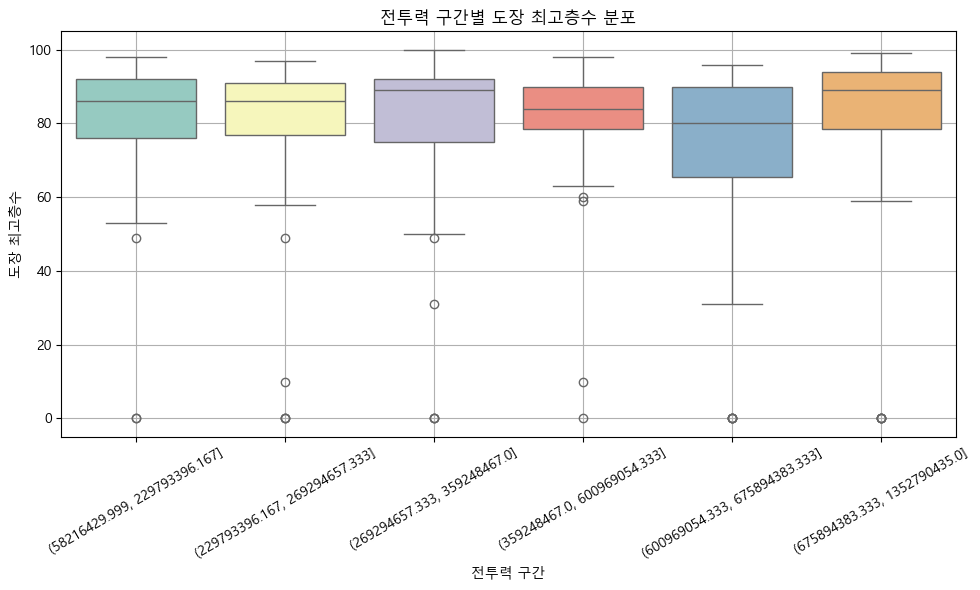

In [29]:
# 전투력을 구간으로 나누기 (6개 분위수)
df["전투력_구간"] = pd.qcut(df["전투력"], q=6, duplicates='drop')

# boxplot 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="전투력_구간", y="dojang_best_floor", palette="Set3")
plt.title("전투력 구간별 도장 최고층수 분포")
plt.xlabel("전투력 구간")
plt.ylabel("도장 최고층수")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

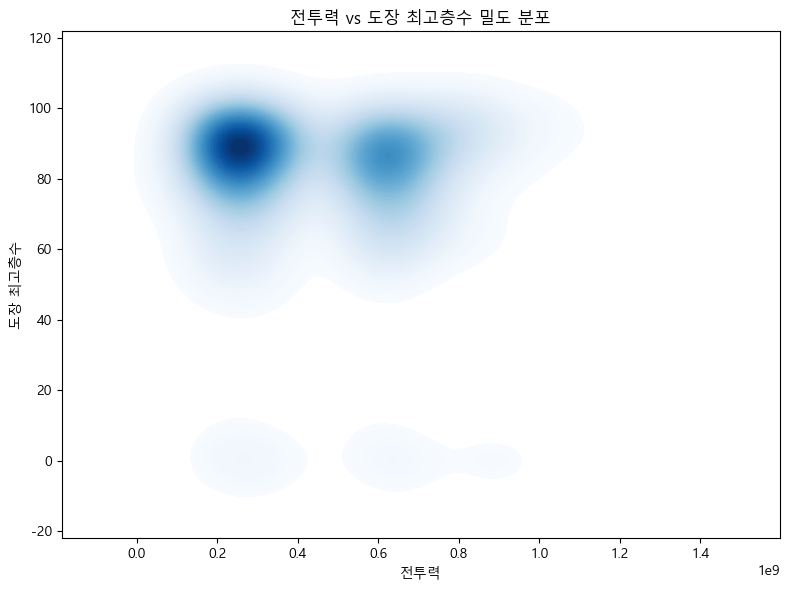

In [28]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df, x="전투력", y="dojang_best_floor",
    fill=True, cmap="Blues", thresh=0.05, levels=100
)
plt.title("전투력 vs 도장 최고층수 밀도 분포")
plt.xlabel("전투력")
plt.ylabel("도장 최고층수")
plt.tight_layout()
plt.show()


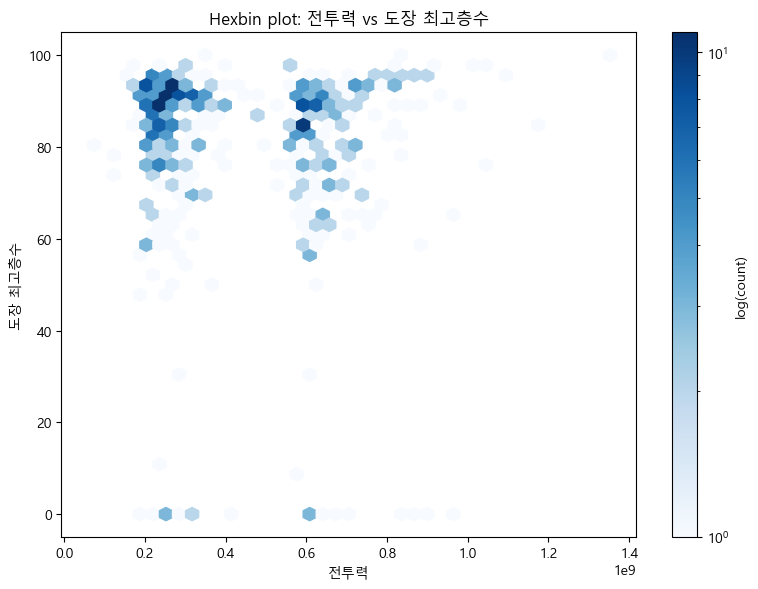

In [27]:
plt.figure(figsize=(8, 6))
plt.hexbin(df["전투력"], df["dojang_best_floor"], gridsize=40, cmap='Blues', bins='log')
plt.colorbar(label='log(count)')
plt.xlabel("전투력")
plt.ylabel("도장 최고층수")
plt.title("Hexbin plot: 전투력 vs 도장 최고층수")
plt.tight_layout()
plt.show()

## 3. 버프 스탯(크확, 벞지 등)과 도장 층수와의 관계

C:\Users\user\AppData\Local\Temp\ipykernel_15652\134697937.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=buff_corr_df, x="spearman_corr", y="feature", palette='Blues_r')


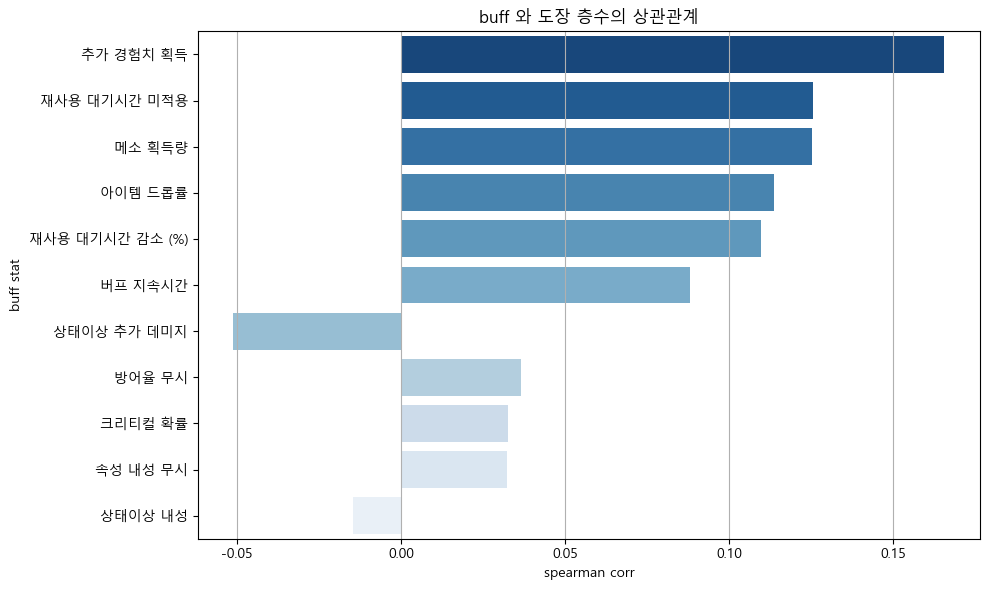

In [30]:
# 버프 관련 컬럼 목록
buff_cols = [
    '방어율 무시', '크리티컬 확률', '상태이상 내성',
    '재사용 대기시간 감소 (%)', '재사용 대기시간 미적용',
    '속성 내성 무시', '상태이상 추가 데미지', '추가 경험치 획득',
    '아이템 드롭률', '메소 획득량', '버프 지속시간'
]

# buff corr
corr_list = []

for col in buff_cols:
    corr, p = spearmanr(df[col], df['dojang_best_floor'])
    corr_list.append({
        "feature" : col,
        "spearman_corr" : corr,
        "abs_corr":abs(corr)
    })

# dataframe 저장 후 시각화 하기
buff_corr_df = pd.DataFrame(corr_list).sort_values("abs_corr", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=buff_corr_df, x="spearman_corr", y="feature", palette='Blues_r')
plt.title('buff 와 도장 층수의 상관관계')
plt.xlabel('spearman corr')
plt.ylabel('buff stat')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

- 이건 좀 의외의 결과인듯
- 어째서 경험치 획득이랑, 메소, 아이템 관련 지표가 상위권에 속하는지 이해가 안됨
- 좀 더 뜯어봐서 확인해봐야 할듯
    - 히트맵을 통해 전체 correlation 확인
    - 평균 도장층수 비교해서 확인

<Axes: >

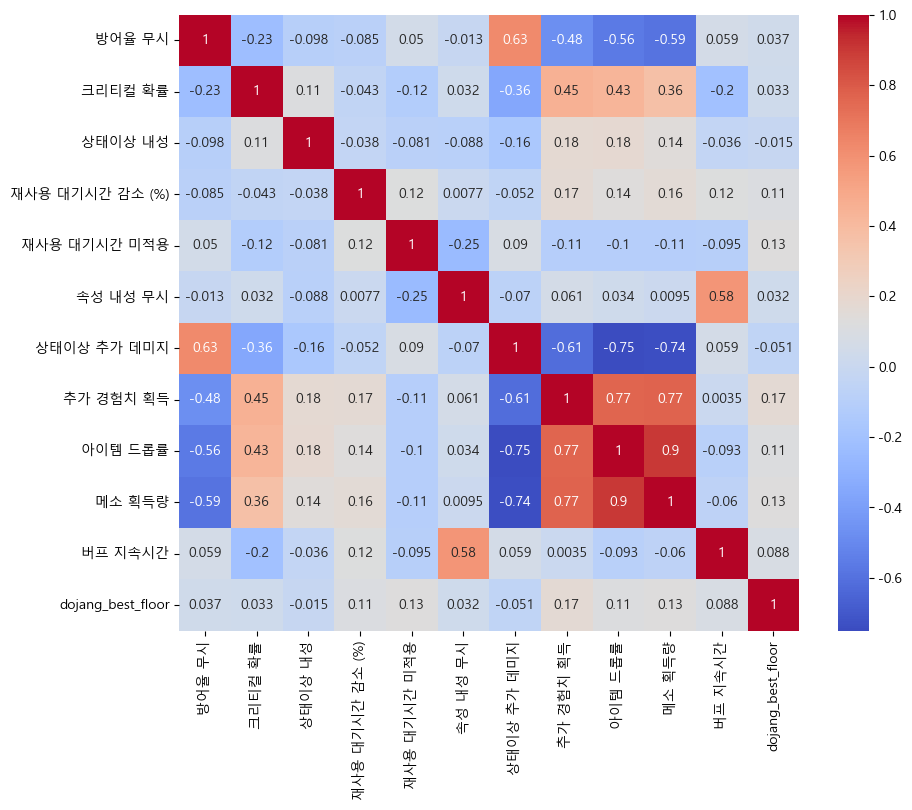

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df[buff_cols + ['dojang_best_floor']].corr(method='spearman'), annot=True, cmap='coolwarm')

- 흠...흐음........일단 다음단계로 가고 나중에 보자

## 4. 공격스탯 관련

- 얘네들은 좀 상관관계가 생각하는대로 나오겠지

C:\Users\user\AppData\Local\Temp\ipykernel_15652\3505061321.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=atk_corr_df, x='spearman_corr', y='feature', palette='rocket')


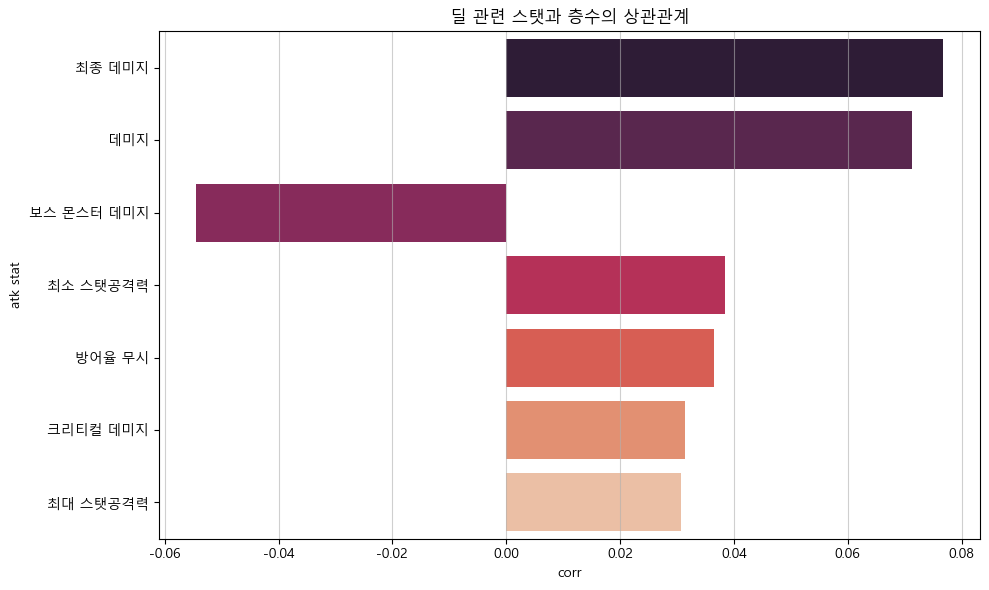

In [47]:
atk_cols = [
    "최소 스탯공격력", "최대 스탯공격력", 
    "데미지", "보스 몬스터 데미지", "최종 데미지", "크리티컬 데미지",
    "방어율 무시" 
]

# atk corr
atk_corr_list = []

for col in atk_cols:
    corr, p = spearmanr(df[col], df['dojang_best_floor'])
    atk_corr_list.append({
        'feature' : col,
        'spearman_corr' : corr,
        'abs_corr' : abs(corr)
    })

atk_corr_df = pd.DataFrame(atk_corr_list).sort_values(by='abs_corr', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=atk_corr_df, x='spearman_corr', y='feature', palette='rocket')
plt.title('딜 관련 스탯과 층수의 상관관계')
plt.xlabel('corr')
plt.ylabel('atk stat')
plt.grid(axis='x', alpha=0.6)
plt.tight_layout()
plt.show()

<Axes: >

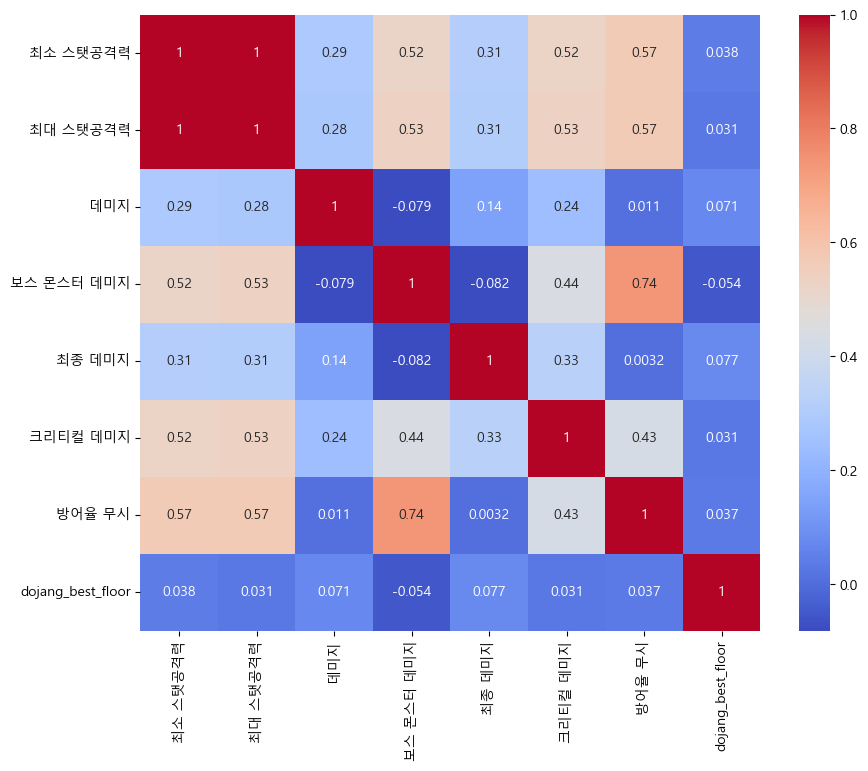

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(df[atk_cols + ['dojang_best_floor']].corr(method='spearman'), annot=True, cmap='coolwarm')

- 아무래도 api의 스탯정보는 추출할때 당시의 캐릭터의 정보다.
- 평소에는 유저들이 사냥을 할 것.
- 무릉도장같은 경우엔 보스를 사냥하기 위한 stat을 세팅하진 않기 때문에 위와 같은 수치가 나오는 듯 한 느낌이다.

- **<span style="color:orange">분석 방향을 스탯보다는 효율성이 좋은 직업을 찾아보기</span>**

------------

## 1. 레벨 대비 도장 성능 분석

- 도장 층수 / 캐릭터 레벨 값을 통해 레벨 대비 효율적인 캐릭터를 찾음
- 어떤 직업의 효율이 좋은지 비교 해보기

C:\Users\user\AppData\Local\Temp\ipykernel_15652\3300286686.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='character_class', y='level_efficiency', palette='Blues_r')


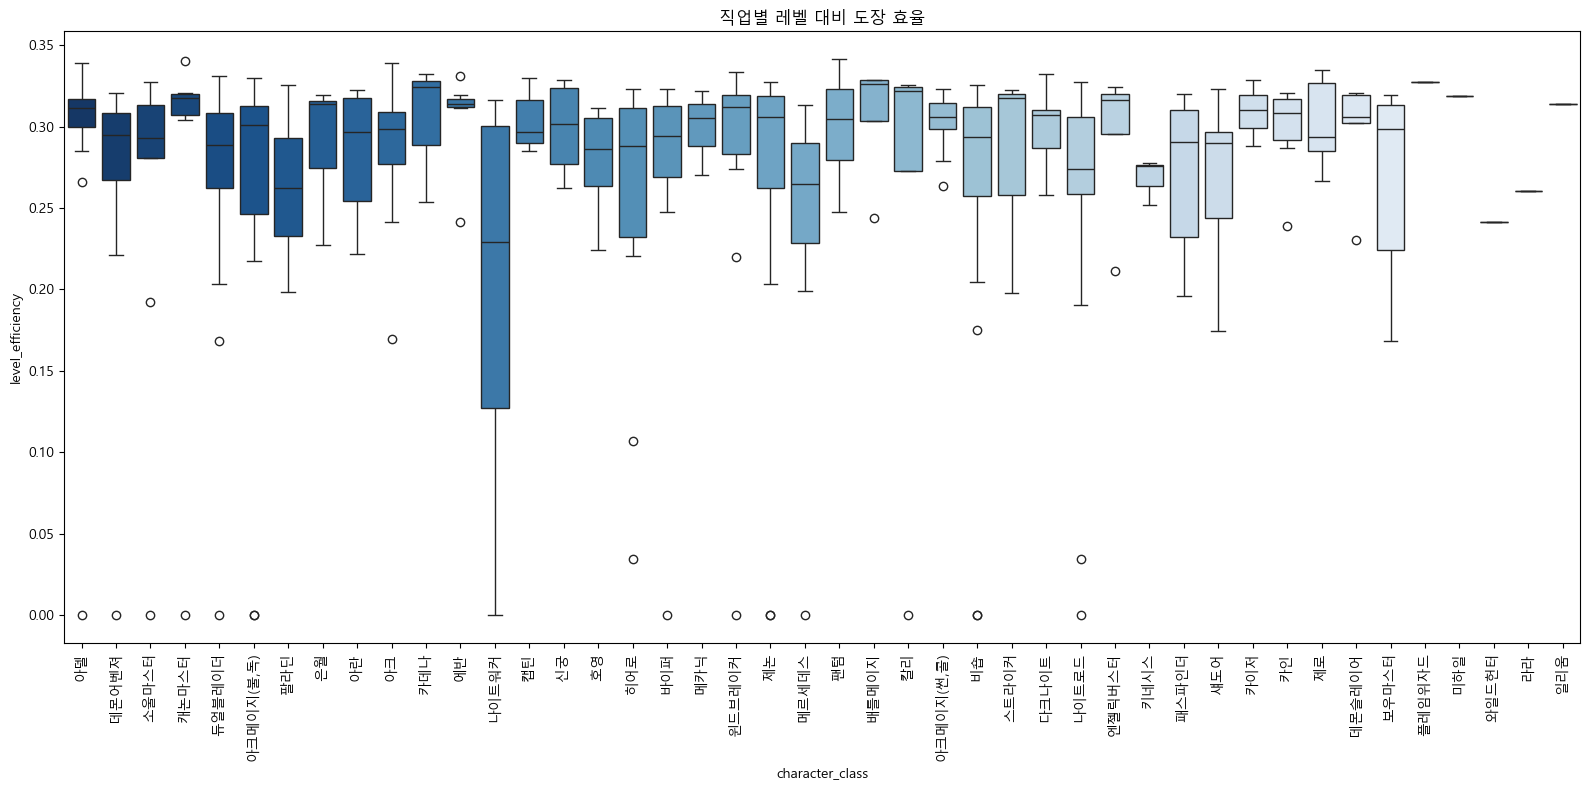

In [62]:
# 레벨 대비 효율 지표
df['level_efficiency'] = df['dojang_best_floor'] / df['character_level']

# 직업별 평균 및 분산
job_efficiency = df.groupby('character_class')['level_efficiency'].agg(['mean','std','count']).sort_values(by='mean', ascending=False)

# 상위 5% 캐릭
threshold = df['level_efficiency'] .quantile(0.95)
top_eff_df = df[df['level_efficiency'] >= threshold]

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='character_class', y='level_efficiency', palette='Blues_r')
plt.xticks(rotation=90)
plt.title('직업별 레벨 대비 도장 효율')
plt.tight_layout()
plt.show()

# 📊 직업별 레벨 대비 도장 효율 분석 (`level_efficiency` 기준)

도장 최고층(`dojang_best_floor`)을 캐릭터 레벨(`character_level`)로 나눈 `level_efficiency`를 기준으로,
각 직업이 동일 레벨 대비 도장에서 얼마나 높은 성과를 보이는지를 시각화함.  

---

## 🥇 효율 상위권 (중앙값 기준)

| 직업 | 분석 |
|------|------|
| **카이저** | 전체적으로 가장 높은 중앙값을 기록하며, 분산도 안정적. 매우 효율적인 직업. |
| **아크메이지(썬,콜)** | 상위 25% 이상이 매우 뛰어난 효율을 보임. 균일한 성능. |
| **카인** | 중앙값이 높고, 상위 퍼포먼스 구간이 넓게 분포. |
| **비숍** | IQR이 좁고 이상치가 적어, 전반적으로 안정적이고 높은 효율. |

---

## 👍 중상위권

| 직업 | 분석 |
|------|------|
| **팔라딘** | 효율이 높으며, 상위 분포도 안정적. |
| **히어로** | 중앙값과 분산 모두 준수한 직업. |
| **소울마스터** | 고른 분포와 준수한 평균 효율. |
| **윈드브레이커** | 다소 분산은 있지만 효율은 상위 수준. |
| **아크** | 분산이 크지만 평균적으로 높은 효율을 기록. |
| **제로** | 중앙값이 높고 상위권과 유사한 성능을 보임. |

---

## ⚖️ 평균 수준

| 직업 | 분석 |
|------|------|
| **듀얼블레이더**, **데몬어벤져**, **아델**, **섀도어**, **보우마스터**, **패스파인더**, **나이트로드** 등 | 중앙값 기준으로 평균 수준이며, 일부 직업은 분산이 큰 편. |

---

## 📉 효율 하위권

| 직업 | 분석 |
|------|------|
| **나이트워커** | 중앙값이 매우 낮고 분산도 큼. 최하위권 직업 중 하나. |
| **에반** | 일부 효율 좋은 유저도 존재하나, 전반적으로 낮은 퍼포먼스. |
| **제논**, **메카닉**, **데몬슬레이어** | 도장 효율이 낮고 안정성도 부족한 직업군. |

---

## ❗ 샘플 수 적음 / 특이값 주의

| 직업 | 분석 |
|------|------|
| **라라**, **일리움** | 극단적으로 높은 효율을 기록했지만, 전체 샘플 수가 적어 해석에 주의 필요. |
| **루미너스** | 효율은 낮은 편이며, 이상치 존재. |
| **플레임위자드**, **미하일**, **카데나** | 낮은 효율과 큰 분산을 보이는 직업군. 샘플이 많지 않아 단정은 어려움. |

---

## 🔍 요약 정리

- ✅ **가장 효율적인 직업**: `카이저`, `아크메이지(썬,콜)`, `카인`, `비숍`
- ⚠️ **주의가 필요한 직업**: `나이트워커`, `제논`, `메카닉`, `에반`
- ❕ **샘플 수 적음**: `미하일`, `일리움`, `라라` 은 그냥 인기가 없는듯

---

## 2. 최소 스탯 공격력 대비 도장 효율

- 최소 스탯대비 도장효율이 가장 잘 나오는 직업 찾아보기

- 최소 스탯공격력 통계 요약표

| 통계 지표 | 값          |
|-----------|-------------|
| Count     | 474         |
| Mean      | 154,113,190 |
| Std       | 81,674,624  |
| Min       | 1           |
| 25%       | 97,361,309  |
| 50%       | 137,934,481 |
| 75%       | 188,806,437 |
| Max       | 825,396,059 |

- **<span style="color:orange">quantile 25% 이상</span>** 인 데이터만 들고 진행
- outlier가 큰 직업군은 도장층수에 대한 욕심이 크지  않을것으로 판단

In [71]:
df['최소 스탯공격력'].describe().astype('int')

count          474
mean     154113190
std       81674624
min              1
25%       97361309
50%      137934481
75%      188806437
max      825396059
Name: 최소 스탯공격력, dtype: int32

C:\Users\user\AppData\Local\Temp\ipykernel_15652\3082774671.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="character_class", y="stat_efficiency", palette='Blues_r')


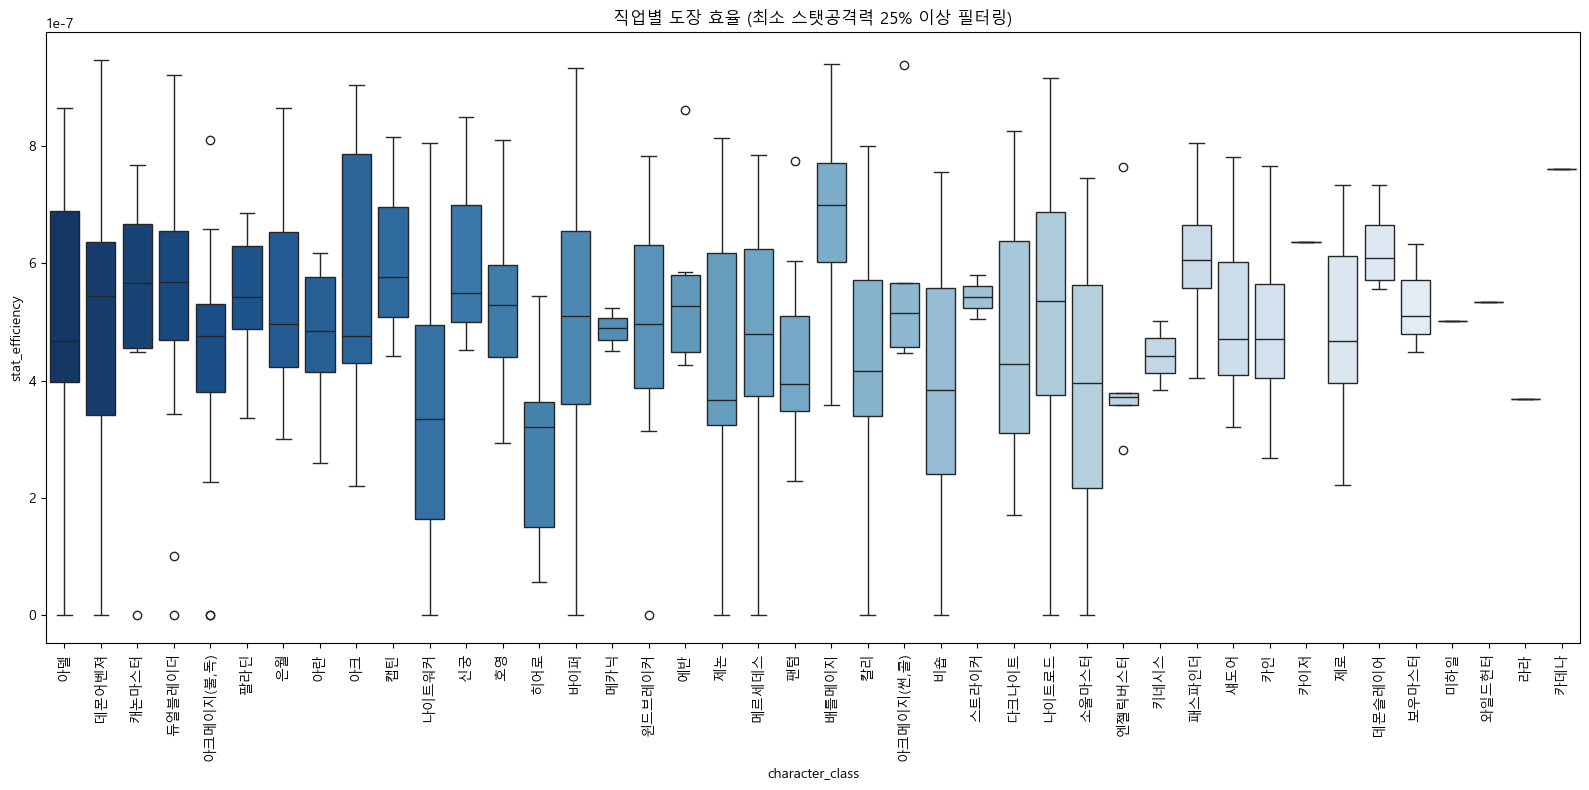

In [75]:
df_min_stat = df['최소 스탯공격력'].quantile(0.25)

# 25% 이상인 데이터만 필터링
df_filtered = df[df['최소 스탯공격력']>= df_min_stat].copy()

df_filtered['stat_efficiency'] = df_filtered['dojang_best_floor'] / df_filtered['최소 스탯공격력']

# 시각화 (직업별 boxplot)
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_filtered, x="character_class", y="stat_efficiency", palette='Blues_r')
plt.xticks(rotation=90)
plt.title("직업별 도장 효율 (최소 스탯공격력 25% 이상 필터링)")
plt.tight_layout()
plt.show()

## ✅ 최소 스탯 공격력 상위 25% 필터링 기반 도장 효율 분석

최소 스탯 공격력이 전체 상위 25% 이상인 캐릭터만 필터링한 후, 각 직업별 도장 효율 (`stat_efficiency = 도장 최고층수 / 최소 스탯공격력`)을 분석한 결과.

---

### 📊 1. 박스플롯 해석 (직업별 분포 비교)

박스플롯은 각 직업의 도장 효율 분포를 시각화한 것. 중앙값이 높고 분포가 안정적일수록 **<span style="color:orange">스탯 대비 효율적인 직업</span>** 이라 볼 수 있음.

- **상위 효율 직업군**
  - `카데나`, `배틀메이지`, `카이저`, `슬레이어`, `신궁`
  - 중앙값과 상자 범위가 높게 위치함 → 스탯 대비 도장 성과 우수

- **중간 효율 직업군**
  - `듀얼블레이더`, `팔라딘`, `제논`, `에반`, `팬텀`, `스트라이커` 등
  - 전체적으로 평균적이나, 분산이 큰 경우도 있어 효율 편차 존재

- **하위 효율 직업군**
  - `히어로`, `나이트워커`, `라라`, `비숍`, `칼리`
  - 중앙값이 낮고 전반적으로 효율이 낮은 값에 몰려 있음

---

C:\Users\user\AppData\Local\Temp\ipykernel_15652\3400845873.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_efficiency.index, y=class_efficiency.values, palette='Blues_r')


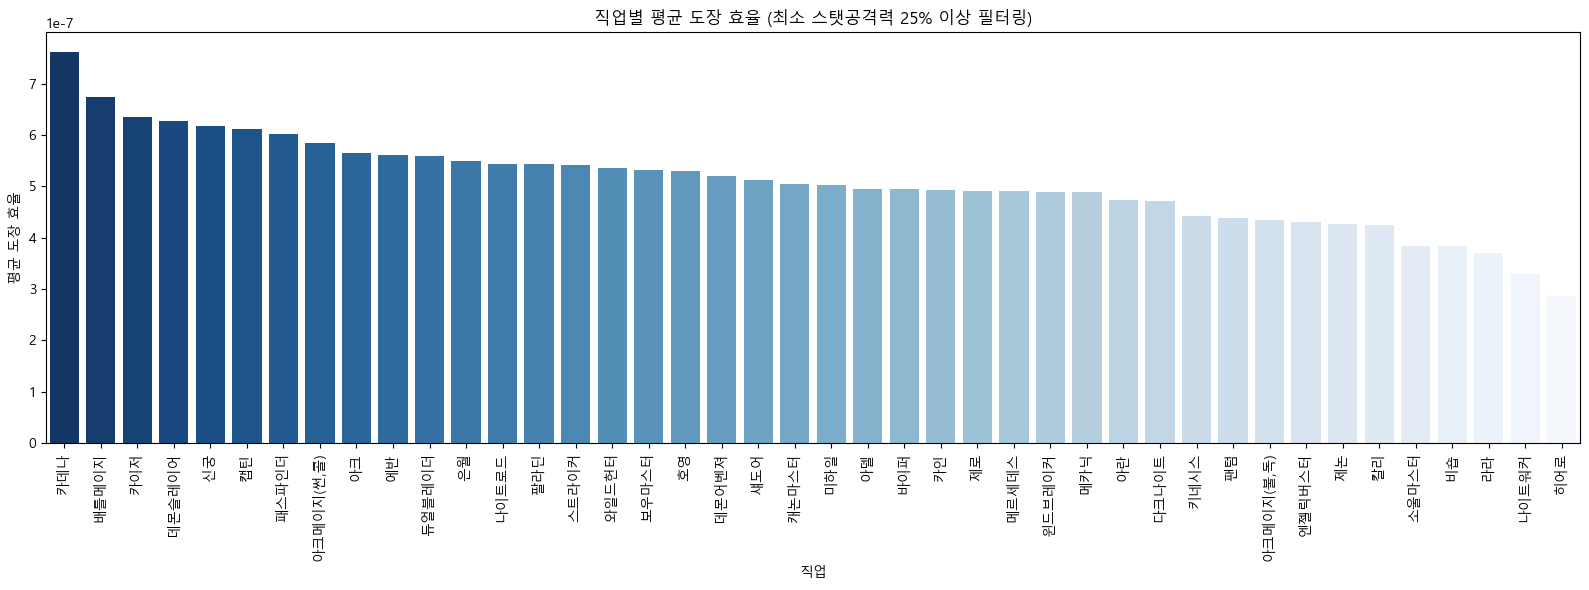

In [76]:
# 직업별 평균 도장 효율 계산
class_efficiency = (
    df_filtered.groupby("character_class")["stat_efficiency"]
    .mean()
    .sort_values(ascending=False)
)

# 막대그래프 시각화
plt.figure(figsize=(16, 6))
sns.barplot(x=class_efficiency.index, y=class_efficiency.values, palette='Blues_r')
plt.xticks(rotation=90)
plt.title("직업별 평균 도장 효율 (최소 스탯공격력 25% 이상 필터링)")
plt.ylabel("평균 도장 효율")
plt.xlabel("직업")
plt.tight_layout()
plt.show()


### 📈 2. 평균 도장 효율 기준 정렬 (막대그래프 해석)

직업별 평균 도장 효율을 기준으로 내림차순 정렬한 결과

- **Top 10 효율 직업**
  1. `카데나`
  2. `배틀메이지`
  3. `카이저`
  4. `데몬슬레이어`
  5. `신궁`
  6. `캡틴`
  7. `패스파인더`
  8. `아크메이지(썬,콜)`
  9. `아크`
  10. `에반`

- **하위 직업군**
  - `히어로`, `나이트워커`, `라라`, `비숍`, `칼리`, `소울마스터`, `엔젤릭버스터` 등
  - 효율이 제일 별로

---

### 📌 요약 

| 구분       | 직업군 예시                              | 특징                                 |
|------------|-------------------------------------------|--------------------------------------|
| 고효율     | 카데나, 배틀메이지, 카이저, 슬레이어, 신궁 | 스탯 대비 도장 성과 매우 우수        |
| 중간효율   | 제논, 듀블, 팔라딘, 팬텀, 에반, 스트라이커 | 스탯 대비 성과 평균, 효율 편차 존재 |
| 저효율     | 히어로, 나워, 라라, 비숍, 칼리           | 스탯이 높아도 도장 성과 낮음        |

---